In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.grid"] = True

# === Wczytanie danych ===
df = pd.read_csv("app/35__welcome_survey_cleaned.csv", sep=";")
df.head()


,age,edu_level,fav_animals,fav_place,gender,hobby_art,hobby_books,hobby_movies,hobby_other,hobby_sport,...,learning_pref_teamwork,learning_pref_workshops,motivation_career,motivation_challenges,motivation_creativity_and_innovation,motivation_money_and_job,motivation_personal_growth,motivation_remote,sweet_or_salty,years_of_experience
0,<18,Podstawowe,Brak ulubionych,NaN,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,0-2
1,25-34,Średnie,Psy,Nad wodą,0.0,0,0,1,0,0,...,1,1,0,1,0,0,1,0,sweet,11-15
2,45-54,Wyższe,Psy,W lesie,0.0,0,0,1,0,0,...,1,1,0,1,0,1,1,0,salty,>=16
3,35-44,Średnie,Koty,W górach,0.0,0,1,1,0,1,...,1,1,0,1,0,1,1,0,sweet,11-15
4,35-44,Wyższe,Psy,Nad wodą,0.0,0,0,0,1,1,...,0,0,0,1,0,0,1,0,sweet,>=16


In [5]:
# === Podstawowe informacje ===
print(f"Wiersze: {df.shape[0]} | Kolumny: {df.shape[1]}")
df.info()


Wiersze: 140 | Kolumny: 28
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   140 non-null    object 
 1   edu_level                             140 non-null    object 
 2   fav_animals                           140 non-null    object 
 3   fav_place                             125 non-null    object 
 4   gender                                138 non-null    float64
 5   hobby_art                             140 non-null    int64  
 6   hobby_books                           140 non-null    int64  
 7   hobby_movies                          140 non-null    int64  
 8   hobby_other                           140 non-null    int64  
 9   hobby_sport                           140 non-null    int64  
 10  hobby_video_games                     140 non-null    int64

In [6]:
# === Statystyki opisowe ===
df.describe(include='all').T.head(10)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,140,8,35-44,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
edu_level,140,3,Wyższe,110,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fav_animals,140,5,Psy,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fav_place,125,4,Nad wodą,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,138.0,NaN,NaN,NaN,0.231884,0.423573,0.0,0.0,0.0,0.0,1.0
hobby_art,140.0,NaN,NaN,NaN,0.128571,0.335927,0.0,0.0,0.0,0.0,1.0
hobby_books,140.0,NaN,NaN,NaN,0.464286,0.500514,0.0,0.0,0.0,1.0,1.0
hobby_movies,140.0,NaN,NaN,NaN,0.492857,0.501744,0.0,0.0,0.0,1.0,1.0
hobby_other,140.0,NaN,NaN,NaN,0.264286,0.442535,0.0,0.0,0.0,1.0,1.0
hobby_sport,140.0,NaN,NaN,NaN,0.464286,0.500514,0.0,0.0,0.0,1.0,1.0


In [7]:
# === Rozkład jednej kolumny kategorycznej ===
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
if cat_cols:
    col = cat_cols[0]
    vc = df[col].value_counts().head(20).reset_index()
    vc.columns = [col, "count"]
    fig = px.bar(vc, x=col, y="count", title=f"Liczności kategorii: {col}")
    fig.show()
else:
    print("Brak kolumn kategorycznych do wizualizacji.")


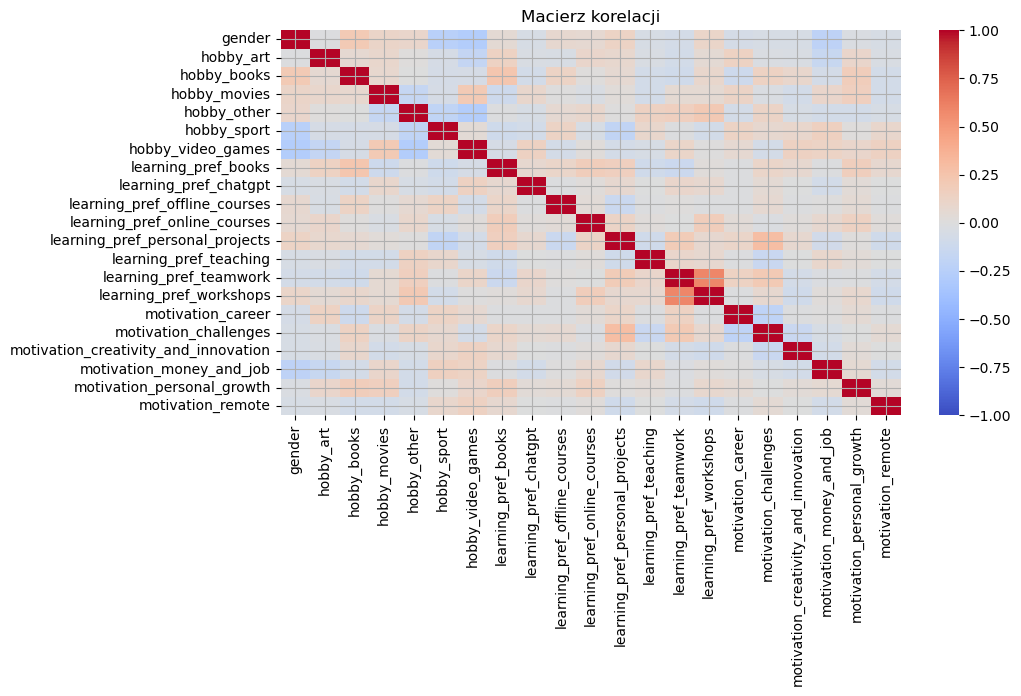

In [8]:
# === Macierz korelacji ===
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if len(num_cols) >= 2:
    corr = df[num_cols].corr()
    fig, ax = plt.subplots()
    sns.heatmap(corr, cmap="coolwarm", vmin=-1, vmax=1, ax=ax)
    ax.set_title("Macierz korelacji")
    plt.show()
else:
    print("Brak kolumn numerycznych do korelacji.")


In [9]:
# === Boxplot: porównanie kolumn numerycznej i kategorycznej ===
if num_cols and cat_cols:
    y_col = num_cols[0]
    x_col = cat_cols[0]
    fig = px.box(df, x=x_col, y=y_col, points="all", title=f"Boxplot: {y_col} ~ {x_col}")
    fig.show()
